# Frequentist approach for comparing two frequencies.

In [8]:
import numpy as np
from scipy.stats import chi2_contingency as chisquare

data = np.array([[2, 38], [4, 46]])
chi2, p, dof, expected = chisquare(data)
print(f"Chi-square value: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")

Chi-square value: 0.020
p-value: 0.887
Degrees of freedom: 1


Interpretation
- The comparison of two samples of frequencies using Chi-squred test yielded p-value 0.887. This is much larger than oft-accepted critical value 0.05. Therefore, we cannot conclude that there is a difference between the two frequencies.

# Bayesian approach for comparing two frequencies.

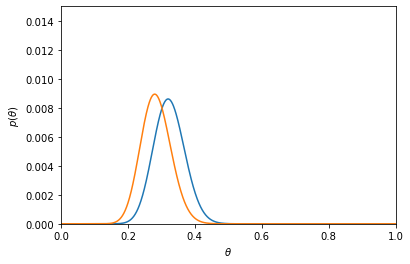

In [6]:
import numpy as np
import matplotlib.pyplot as plt

thetas = np.linspace(0, 1, 1001)

def likelihood(X):
    if X == 1:
        return thetas
    else:
        return 1 - thetas

def posterior(X, prior):
    lp = likelihood(X) * prior
    return lp / np.sum(lp)


p_a = np.array([1 / len(thetas) for _ in thetas])
purchase_a = 32
nopurchase_a = 68
for _ in range(purchase_a):
    p_a = posterior(1, p_a)
for _ in range(nopurchase_a):
    p_a = posterior(0, p_a)
plt.plot(thetas, p_a)

p_b = np.array([1 / len(thetas) for _ in thetas])
purchase_b = 28
nopurchase_b = 72
for _ in range(purchase_b):
    p_b = posterior(1, p_b)
for _ in range(nopurchase_b):
    p_b = posterior(0, p_b)

plt.plot(thetas, p_b)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim([0, 1.0])
plt.ylim([0, 0.015])
plt.show()

Interpretations
- The posterior distributions of conversion rates for both Design A and Design B are flat and wide. The thetas for both distributions range from somewhere around 0.2 to a little over 0.4. This shows that we are quite uncertain about the true value of the thetas.
- The two posteiror distributions overlaps significantly. Thus, we cannot conclude whether two design are differnt or not.